In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

# Exercise 1: Basic image processing

## a) Read the image

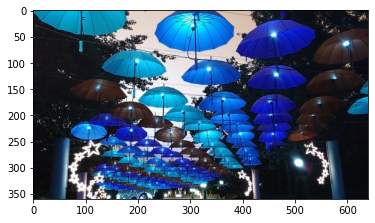

In [2]:
umbrellas_BRG = cv2.imread('images/umbrellas.jpg')
plt.imshow(umbrellas_BRG)

OpenCV use BRG but Matplotlib expects RGB image:

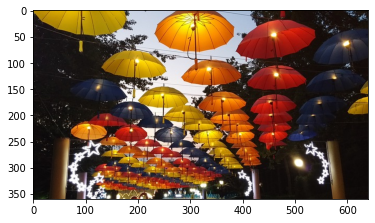

In [3]:
umbrellas_RGB = cv2.cvtColor(umbrellas_BRG, cv2.COLOR_BGR2RGB)
plt.imshow(umbrellas_RGB)

In [4]:
height, width, channels = umbrellas_RGB.shape
print(f"height: {height}, width: {width}, channels: {channels}")
print(f"dtype: {umbrellas_RGB.dtype}")
print(f"value of 1st pixel {umbrellas_RGB[0][0]}")

height: 360, width: 640, channels: 3
dtype: uint8
value of 1st pixel [170 112   0]


In [5]:
umbrellas_float = umbrellas_RGB.astype(np.float)
print(f"value of 1st pixel {umbrellas_float[0][0]}")

value of 1st pixel [170. 112.   0.]


## b) Convert the image to grayscale

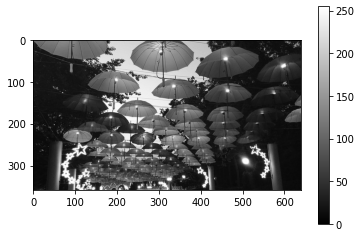

In [6]:
umbrellas_gray = (umbrellas_float[:,:,0] + umbrellas_float[:,:,1] + umbrellas_float[:,:,2])/3

plt.imshow(umbrellas_gray, cmap='gray')
plt.colorbar()

## c) Cut and display

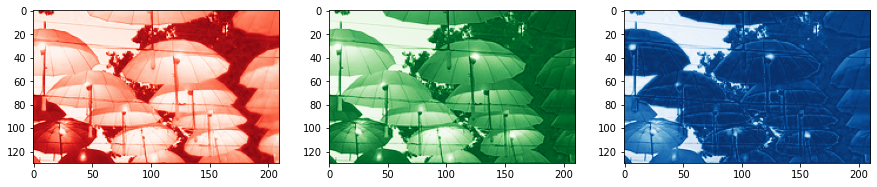

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(umbrellas_RGB[130:260, 240:450, 0], cmap='Reds_r')
plt.subplot(1,3,2)
plt.imshow(umbrellas_RGB[130:260, 240:450, 1], cmap='Greens_r')
plt.subplot(1,3,3)
plt.imshow(umbrellas_RGB[130:260, 240:450, 2], cmap='Blues_r')

__*Question:*__ Why would you use different color maps?

> To better see the difference of otherwise similar values.

## d) Replace part of the image

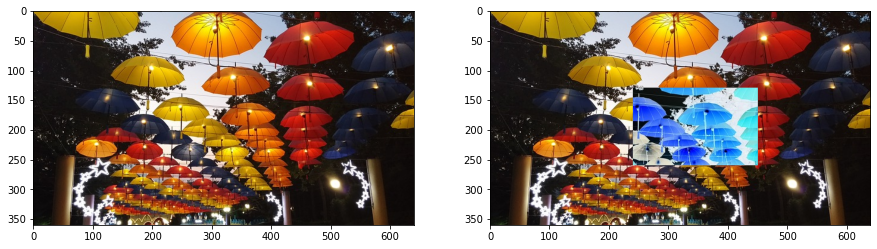

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.imshow(umbrellas_RGB)
plt.subplot(1,2,2)
umbrellas_replaced = umbrellas_RGB.copy()
umbrellas_replaced[130:260, 240:450] = 255-umbrellas_RGB[130:260, 240:450]
plt.imshow(umbrellas_replaced)


__*Question*__: How is inverting a grayscale value defined for uint8 ?

> By suptracting the pixel value from [255, 255, 255]

## e) Perform a reduction of grayscale levels in the image

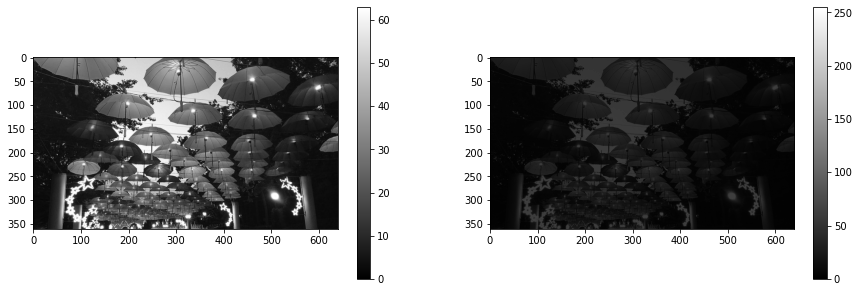

In [9]:
umbrellas_gray_rescaled = umbrellas_gray / 255 * 63

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(umbrellas_gray_rescaled, cmap='gray')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(umbrellas_gray_rescaled, cmap='gray', vmax=255)
plt.colorbar()

# Excercise 2: Thresholding and histograms

## a) Create a binary mask from a grayscale image

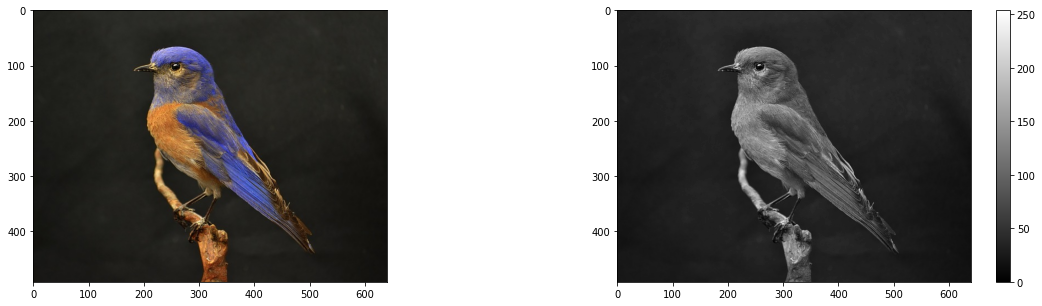

In [10]:
bird_BRG = cv2.imread('images/bird.jpg')
bird_RGB = cv2.cvtColor(bird_BRG, cv2.COLOR_BGR2RGB)
bird_gray = cv2.cvtColor(bird_RGB, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.imshow(bird_RGB)
plt.subplot(1,2,2)
plt.imshow(bird_gray, cmap='gray')
plt.colorbar()

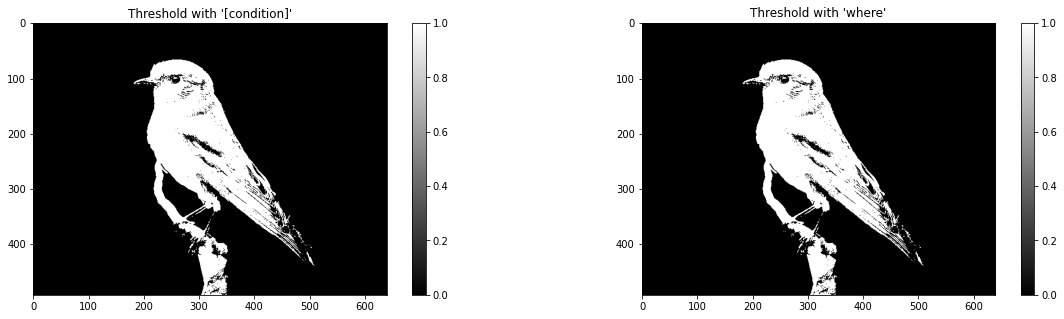

In [11]:
threshold = 60
plt.figure(figsize=(20,5))

I_mask = np.zeros(shape=bird_gray.shape, dtype=np.uint8)
I_mask[bird_gray<threshold] = 0
I_mask[bird_gray>=threshold] = 1
plt.subplot(1,2,1)
plt.title("Threshold with '[condition]'")
plt.imshow(I_mask, cmap='gray')
plt.colorbar()

I_mask_where = np.where(bird_gray < threshold, 0, 1)
plt.subplot(1,2,2)
plt.title("Threshold with 'where'")
plt.imshow(I_mask_where, cmap='gray')
plt.colorbar()

## b) My histogram

In [12]:
def myhist(img, n_bins):
	H = np.zeros(n_bins)
	x = np.zeros(n_bins)
	nv = 256 # number of possible values
	for v in img.flatten():
		i = math.floor(v/nv * n_bins)
		H[i] += 1

	s = np.sum(H)
	
	for i in range(n_bins):
		x[i] = i/n_bins * nv
		H[i] /= s
	
	return x, H

__*Question*__: The histograms are usually normalized by dividing the result by the
sum of all cells. Why is that?

> We don't want histogram values taht depend on image size.

<BarContainer object of 255 artists>

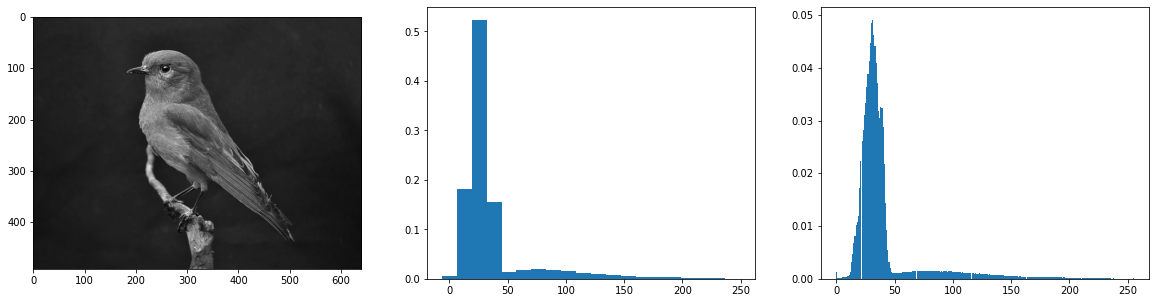

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.imshow(bird_gray, cmap='gray')

plt.subplot(1,3,2)
x, H = myhist(bird_RGB, 20)
plt.bar(x, H, width=255/20)

plt.subplot(1,3,3)
x, H = myhist(bird_RGB, 255)
plt.bar(x, H, width=255/255)

## c) My better histogram
no longer assume the uint8 range
for values

In [14]:
def mybetterhist(img, n_bins):
	v_min = np.min(img)
	v_max = np.max(img)
	v_n = v_max - v_min + 1 # number of possible values
	H = np.zeros(n_bins)
	x = np.zeros(n_bins)
	for v in img.flatten():
		i = math.floor((v-v_min)/v_n * n_bins)
		H[i] += 1

	s = np.sum(H)
	
	for i in range(n_bins):
		x[i] = i/n_bins * v_n + v_min
		H[i] /= s
	
	return x, H

In [15]:
bird_dark = bird_gray / 2

<BarContainer object of 20 artists>

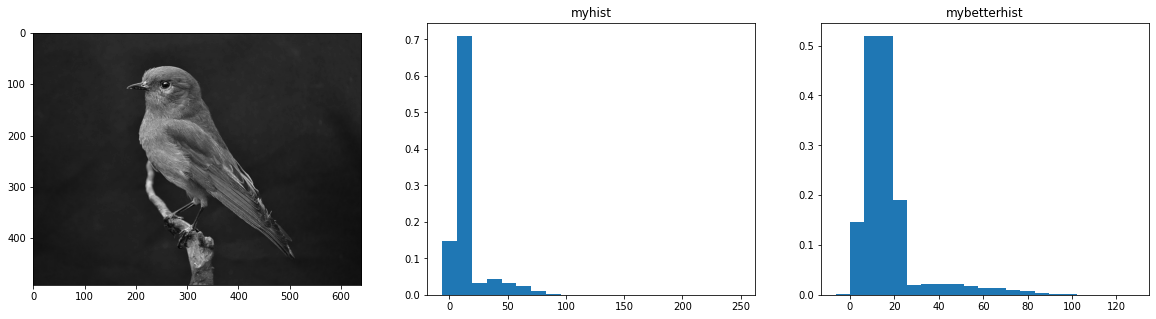

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.imshow(bird_dark, cmap='gray')

plt.subplot(1,3,2)
plt.title("myhist")
x, H = myhist(bird_dark, 20)
plt.bar(x, H, width=255/20)

plt.subplot(1,3,3)
plt.title("mybetterhist")
x, H = mybetterhist(bird_dark, 20)
plt.bar(x, H, width=255/20)

## d) different lighting conditions

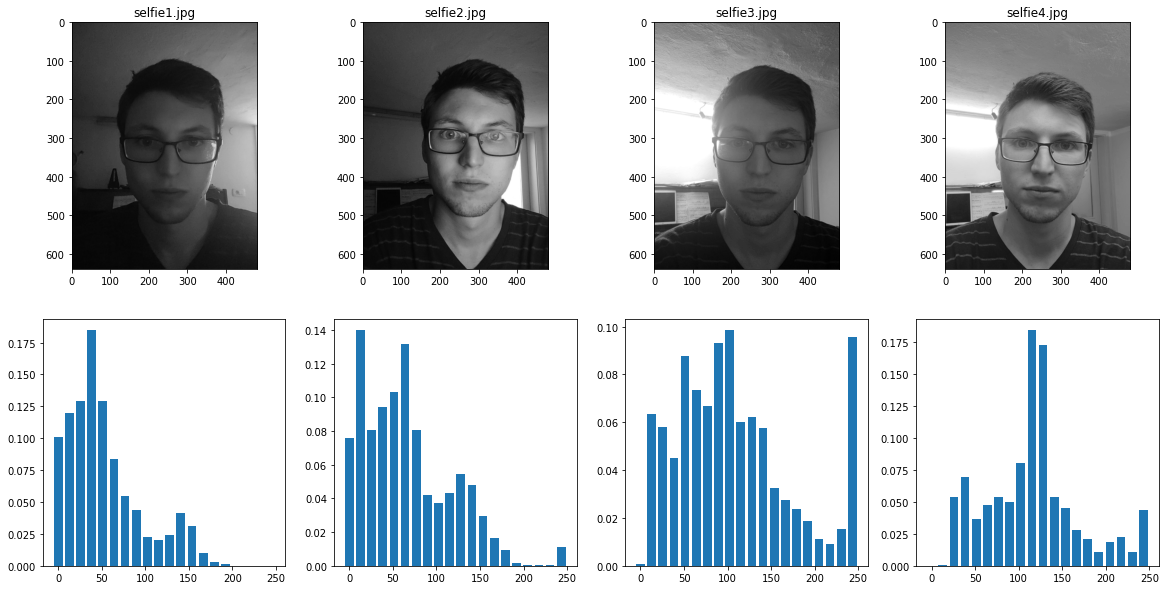

In [17]:
images = ["selfie1.jpg", "selfie2.jpg", "selfie3.jpg", "selfie4.jpg"]

plt.figure(figsize=(20,10))
for i, image in enumerate(images):
	plt.subplot(2, len(images), i+1)
	plt.title(image)
	img = cv2.imread(f'images/{image}')
	img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	plt.imshow(img_gray, cmap='gray')

	plt.subplot(2, len(images), len(images) + i+1)
	x, H = myhist(img_gray, 20)
	plt.bar(x,H, width=10)


## e) Otsu’s method

In [18]:
def otsu(img):
	l_count = 0
	d_count = 0
	l_sum = 0
	d_sum = 0

	# compute histogram
	nv = 256 # number of possible values
	counts = np.zeros(nv) # counts per bins
	for v in img.flatten():
		counts[v] += 1
		d_count += 1
		d_sum += v

	# find best variance
	v_max = 0
	threshold = 0
	for i in range(nv):
		# update count & sum ...
		l_count += counts[i]
		d_count -= counts[i]
		l_sum += counts[i] * i
		d_sum -= counts[i] * i

		# compute variance
		if d_count == 0 or l_count == 0: continue
		l_median = l_sum / l_count
		d_median = d_sum / d_count

		variance = l_count * d_count * (l_median - d_median) ** 2


		if variance > v_max:
			v_max = variance
			threshold = i

	return threshold

	

74


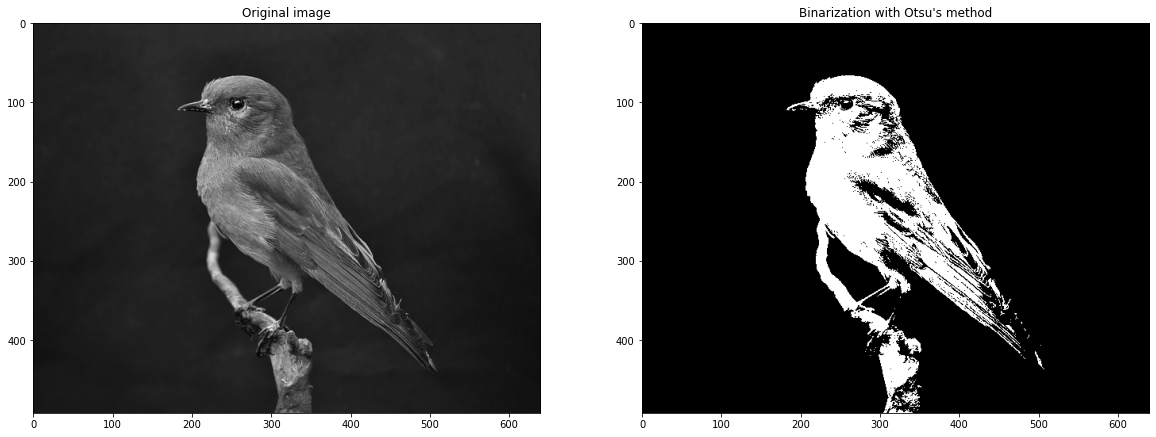

In [19]:
threshold = otsu(bird_gray)
print(threshold)
I_t = bird_gray > threshold

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(bird_gray, cmap='gray')

plt.subplot(1,2,2)
plt.title("Binarization with Otsu's method")
plt.imshow(I_t, cmap='gray')

# Exercise 3: Morphological operations and regions

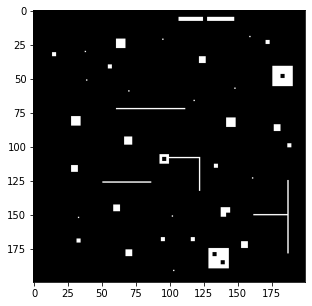

In [20]:
I_BRG = cv2.imread('images/mask.png')
I_RGB = cv2.cvtColor(I_BRG, cv2.COLOR_BGR2RGB)
I = cv2.cvtColor(I_RGB, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20,5))
plt.imshow(I, cmap='gray')

## a) We will perform two basic morphological operations

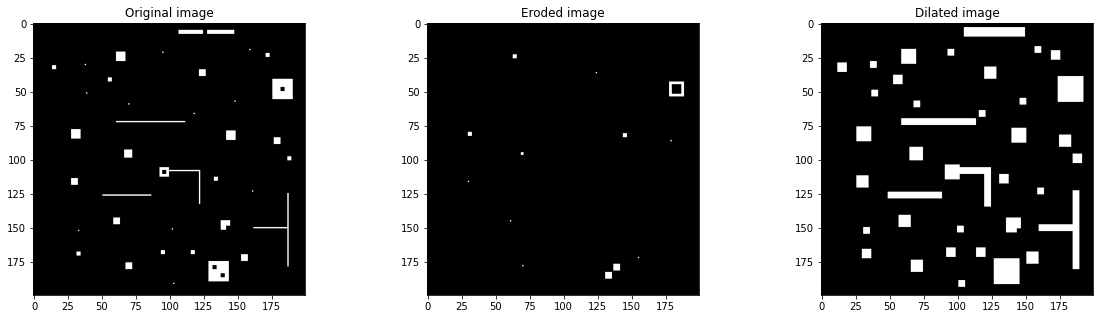

In [21]:
n = 5
SE = np.ones((n,n), np.uint8) # create a square structuring element
I_eroded = cv2.erode(I, SE)
I_dilated = cv2.dilate(I, SE)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("Original image")
plt.imshow(I, cmap='gray')
plt.subplot(1,3,2)
plt.title("Eroded image")
plt.imshow(I_eroded, cmap='gray')
plt.subplot(1,3,3)
plt.title("Dilated image")
plt.imshow(I_dilated, cmap='gray')

__*Question:*__ Based on the results, which order of erosion and dilation operations
produces opening and which closing?

> first `dilation` then `erosion` = `closing`
>
> first `erosion` then `dilatioin` = `opening`


## b) Try to clean up the mask

In [22]:
bird_BRG = cv2.imread('images/bird.jpg')
bird_RGB = cv2.cvtColor(bird_BRG, cv2.COLOR_BGR2RGB)
bird_gray = cv2.cvtColor(bird_RGB, cv2.COLOR_RGB2GRAY)

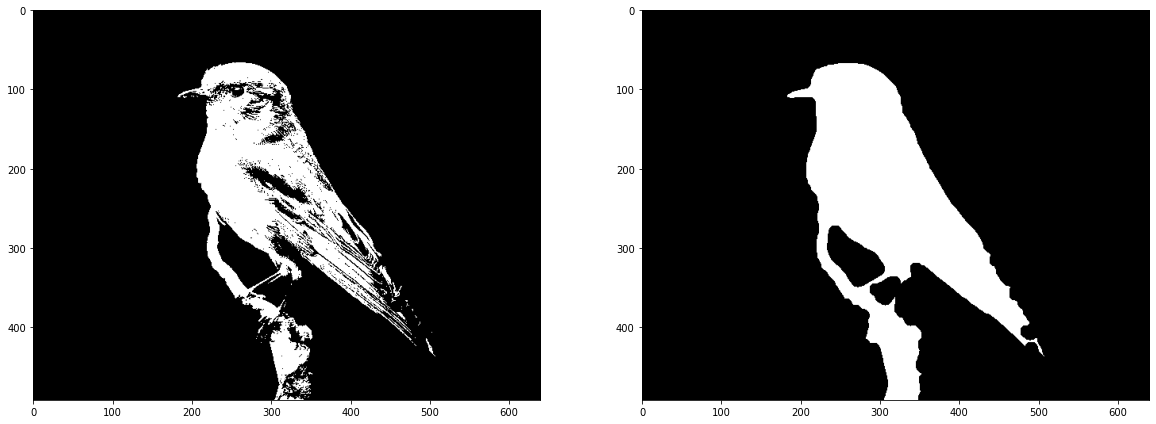

In [23]:
plt.figure(figsize=(20,10))
threshold = otsu(bird_gray) # determined with Otsu's method from previous exercise

bird_mask = np.where(bird_gray > threshold, 1.0, 0.0)
plt.subplot(1,2,1)
plt.imshow(bird_mask, cmap='gray')

SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(16,16))
bird_mask = cv2.morphologyEx(bird_mask, cv2.MORPH_CLOSE, SE)

plt.subplot(1,2,2)
plt.imshow(bird_mask, cmap='gray')


## c) Write a function `immask`

In [24]:
def immask(img, mask, val=0):
	mask3 = np.stack((mask,)*3, axis=-1)
	img_crop = img.copy()
	img_crop[mask3 == 0] = val
	return img_crop


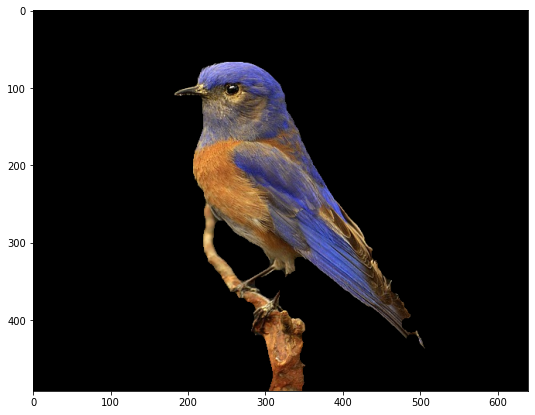

In [25]:
i = immask(bird_RGB, bird_mask)

plt.figure(figsize=(20,7))
plt.imshow(i)

## d) Create a mask from the image in file eagle.jpg

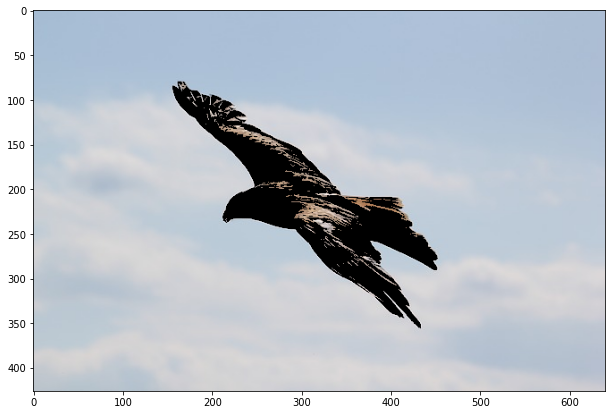

In [34]:
eagle_BRG = cv2.imread('images/eagle.jpg')
eagle_RGB = cv2.cvtColor(eagle_BRG, cv2.COLOR_BGR2RGB)
eagle_gray = cv2.cvtColor(eagle_RGB, cv2.COLOR_RGB2GRAY)

threshold = otsu(eagle_gray)

eagle_mask = np.where(eagle_gray > threshold, 1.0, 0.0)

SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(16,16))
# eagle_mask = cv2.morphologyEx(eagle_mask, cv2.MORPH_CLOSE, SE)

i = immask(eagle_RGB, eagle_mask)

plt.figure(figsize=(20,7))
plt.imshow(i)

__*Question:*__ Why is the background included in the mask and not the object? How would you fix that in general? (just inverting the mask if necessary doesn’t count)

> One could use a metric such as area, amount of pixels touching the edge or variance to determine whethe to invert the mask or not. 

## e) Another way to process a mask

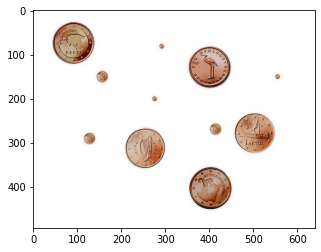

In [27]:
coins_BRG = cv2.imread('images/coins.jpg')
coins_RGB = cv2.cvtColor(coins_BRG, cv2.COLOR_BGR2RGB)
coins_gray = cv2.cvtColor(coins_RGB, cv2.COLOR_RGB2GRAY)

plt.imshow(coins_RGB)

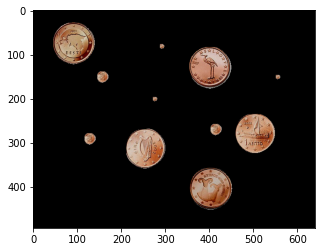

In [28]:
threshold = otsu(coins_gray)
coins_mask = np.where(coins_gray > threshold, 0.0, 1.0)

SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
coins_mask = cv2.morphologyEx(coins_mask, cv2.MORPH_CLOSE, SE)

coins_crop = immask(coins_RGB, coins_mask)

plt.imshow(coins_crop)

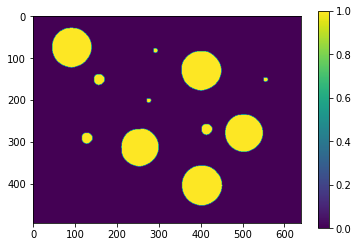

In [29]:
plt.imshow(coins_mask)
plt.colorbar()

There are 12 coins.


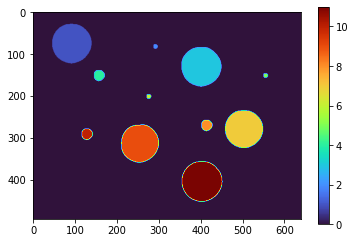

In [30]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(coins_mask.astype('uint8'))
print(f"There are {num_labels} coins.")
plt.imshow(labels, cmap='turbo')
plt.colorbar()

In [31]:
coins_removed = coins_mask.copy()
for i, (left, top, width, height, area) in enumerate(stats):
	print(i, area > 700, area)
	if area > 700:
		coins_removed[labels == i] = 0


0 True 280602
1 True 6964
2 False 90
3 True 6998
4 False 519
5 False 85
6 False 84
7 True 6319
8 False 518
9 True 6305
10 False 521
11 True 7155


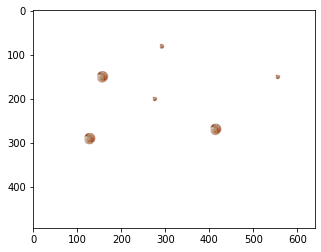

In [32]:
coins_removed_crop = immask(coins_RGB, coins_removed, val=255)

plt.imshow(coins_removed_crop)